In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

import scipy

In [2]:
"""import os

# Set the DEEPLAKE_DOWNLOAD_PATH environment variable
os.environ["DEEPLAKE_DOWNLOAD_PATH"] = "/Users/mohamadnoureldine/Courses/Projects/Emotion-recognition"


train_set = deeplake.load('hub://activeloop/fer2013-train', access_method='local')
test_set = deeplake.load('hub://activeloop/fer2013-public-test', access_method='local')"""


'import os\n\n# Set the DEEPLAKE_DOWNLOAD_PATH environment variable\nos.environ["DEEPLAKE_DOWNLOAD_PATH"] = "/Users/mohamadnoureldine/Courses/Projects/Emotion-recognition"\n\n\ntrain_set = deeplake.load(\'hub://activeloop/fer2013-train\', access_method=\'local\')\ntest_set = deeplake.load(\'hub://activeloop/fer2013-public-test\', access_method=\'local\')'

In [3]:
img_size = 48 #original size of the image


In [4]:
# Data augmentation

train_datagen = ImageDataGenerator(rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
# option for data augmentation

train_dir = os.path.join('train')
test_dir = os.path.join('test')


train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

epochs = 60 #TODO change to 60
batch_size = 64 

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [8]:

history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)


Epoch 1/60
359/359 [==============================] - 273s 757ms/step - loss: 5.1122 - accuracy: 0.2015 - val_loss: 2.4377 - val_accuracy: 0.2297
Epoch 2/60
359/359 [==============================] - 275s 767ms/step - loss: 2.1113 - accuracy: 0.2181 - val_loss: 1.8757 - val_accuracy: 0.2528
Epoch 3/60
359/359 [==============================] - 277s 770ms/step - loss: 1.9496 - accuracy: 0.2255 - val_loss: 1.8995 - val_accuracy: 0.2409
Epoch 4/60
359/359 [==============================] - 279s 776ms/step - loss: 1.9628 - accuracy: 0.2347 - val_loss: 1.9219 - val_accuracy: 0.2479
Epoch 5/60
359/359 [==============================] - 299s 832ms/step - loss: 1.8989 - accuracy: 0.2375 - val_loss: 1.9359 - val_accuracy: 0.2486
Epoch 6/60
359/359 [==============================] - 293s 817ms/step - loss: 1.8906 - accuracy: 0.2414 - val_loss: 1.9065 - val_accuracy: 0.2465
Epoch 7/60
359/359 [==============================] - 281s 781ms/step - loss: 1.9311 - accuracy: 0.2409 - val_loss: 3.6775 -

In [9]:
# Saving the model locally
model.save('model_sixty_epochs')  # Save the model to a directory named 'my_model'


INFO:tensorflow:Assets written to: model_sixty_epochs/assets


INFO:tensorflow:Assets written to: model_sixty_epochs/assets


In [10]:

# Load the model
loaded_model = tf.keras.models.load_model('model_sixty_epochs')


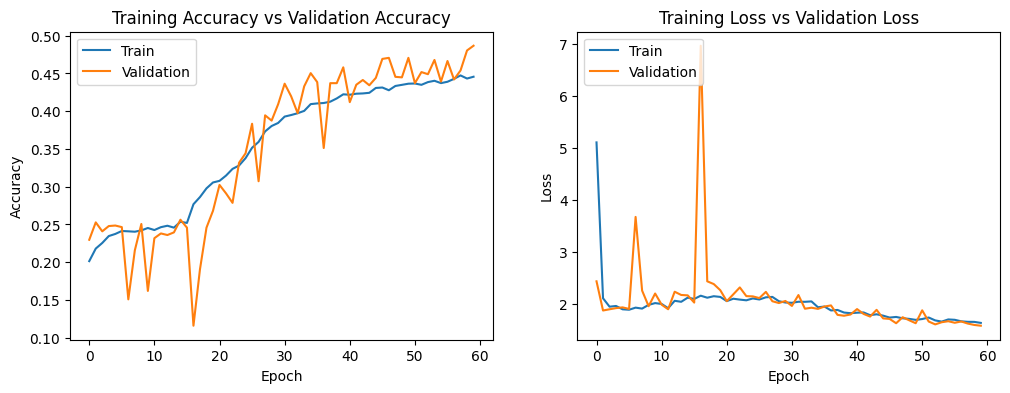

In [11]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

(48, 48)


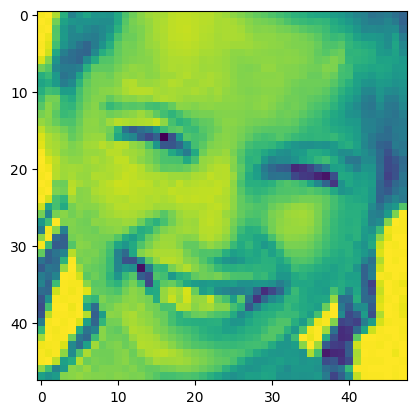

In [12]:
img = image.load_img("test/happy/PrivateTest_647018.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [13]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [14]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 0s 168ms/step
[0.9999982, 0.0, 1.7389852e-06, 0.0, 0.0, 0.0, 0.0]


In [15]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Angry


In [16]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 7s 300ms/step - loss: 1.5828 - accuracy: 0.4867
final train accuracy = 44.74 , validation accuracy = 48.67
